In [3]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
gen = ImageDataGenerator(rotation_range = 30, # 회전 30도 이내
                        width_shift_range=0.3, # 가로이동 0.3 이내
                        shear_range=0.4, # 기울이기 0.4 이내
                        horizontal_flip=True) # 수평 뒤집기

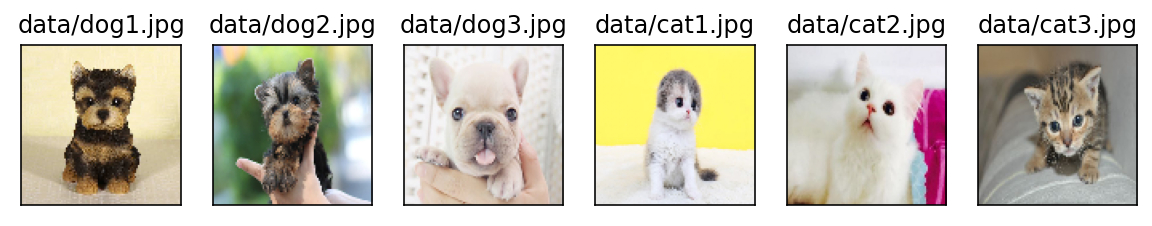

In [7]:
img_array_list = []
img_names = ['data/dog1.jpg', 'data/dog2.jpg', 'data/dog3.jpg', 'data/cat1.jpg', 'data/cat2.jpg', 'data/cat3.jpg']

for i in range(len(img_names)):
    loaded_img = load_img(img_names[i], target_size=(100, 100))
    
    loaded_img_array = img_to_array(loaded_img) / 255.0
    
    img_array_list.append(loaded_img_array)
    
plt.figure(figsize=(10,10))
for i in range(len(img_array_list)):
    plt.subplot(1, len(img_array_list), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img_array_list[i])

In [8]:
batch_size = 3
data_gen = gen.flow(np.array(img_array_list), batch_size=batch_size)

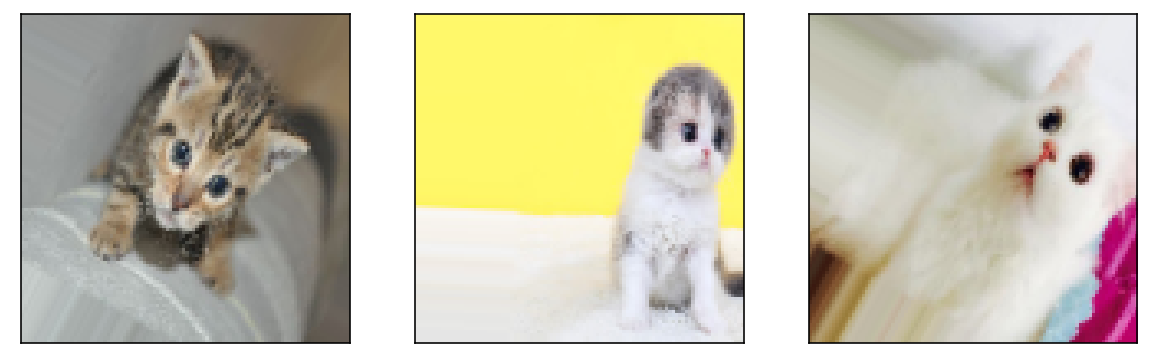

In [10]:
img = data_gen.next()

plt.figure(figsize=(10,10))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

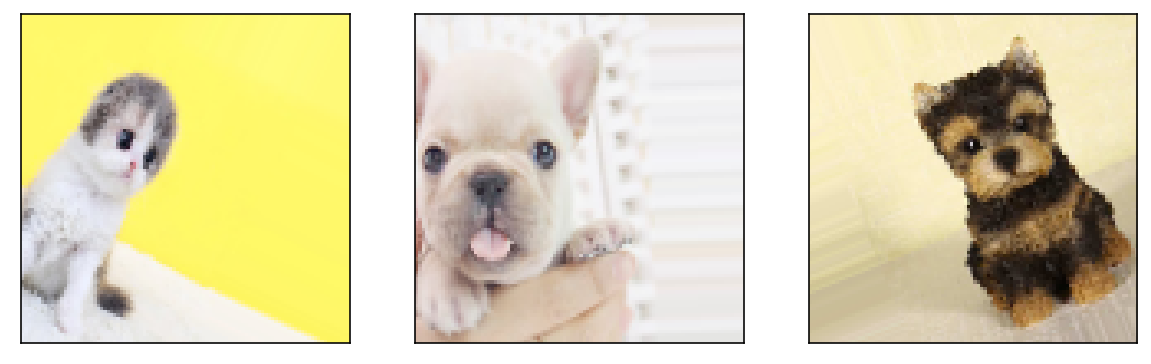

In [11]:
img = data_gen.next()

plt.figure(figsize=(10,10))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

In [12]:
gen = ImageDataGenerator(rotation_range = 30, # 회전 30도 이내
                        width_shift_range=0.3, # 가로이동 0.3 이내
                        shear_range=0.3, # 기울이기 0.4 이내
                        rescale=1./255) 

In [14]:
data_path = 'data/anmmal'
batch_size = 4

data_gen = gen.flow_from_directory(directory=data_path,
                                  batch_size=batch_size,
                                  shuffle=True,
                                  target_size=(100, 100),
                                  class_mode='categorical')

Found 304 images belonging to 4 classes.


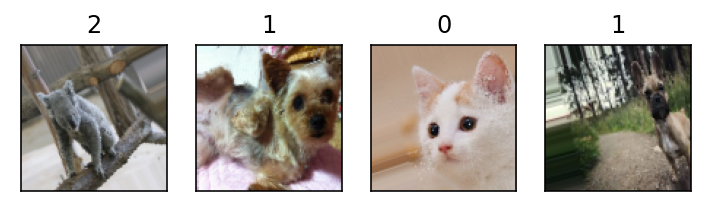

In [15]:
img, label = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    
    plt.imshow(img[i])